In [1]:
# Importing the necessary liabraries
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

In [2]:
# Reading a data
data = pd.read_csv('learningSet.csv')

In [3]:
# Checking rows and columns of data
data.shape

(95412, 481)

In [4]:
data.head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,...,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,,,5202,0,,...,0.0,0,L,2,G,X,X,X,1.0,A
2,9001,AMH,1,NC,27017,,,0,0,,...,0.0,1,L,4,E,X,X,X,60.0,C
3,8701,BRY,0,CA,95953,,,2801,0,,...,0.0,1,L,4,E,X,X,X,41.0,C
4,8601,,0,FL,33176,,,2001,0,X,...,0.0,1,L,2,F,X,X,X,26.0,A


In [5]:
data.columns

Index(['ODATEDW', 'OSOURCE', 'TCODE', 'STATE', 'ZIP', 'MAILCODE', 'PVASTATE',
       'DOB', 'NOEXCH', 'RECINHSE',
       ...
       'TARGET_D', 'HPHONE_D', 'RFA_2R', 'RFA_2F', 'RFA_2A', 'MDMAUD_R',
       'MDMAUD_F', 'MDMAUD_A', 'CLUSTER2', 'GEOCODE2'],
      dtype='object', length=481)

**Complete the following steps on the categorical columns in the dataset:**

In [6]:
categorical = data[data.select_dtypes('object').columns]

In [7]:
categorical.head()

,OSOURCE,STATE,ZIP,MAILCODE,PVASTATE,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,...,RFA_21,RFA_22,RFA_23,RFA_24,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,GRI,IL,61081,,,0,,,,,...,S4E,S4E,S4E,S4E,L,E,X,X,X,C
1,BOA,CA,91326,,,0,,,,,...,N1E,N1E,,F1E,L,G,X,X,X,A
2,AMH,NC,27017,,,0,,,,,...,,S4D,S4D,S3D,L,E,X,X,X,C
3,BRY,CA,95953,,,0,,,,,...,A1D,A1D,,,L,E,X,X,X,C
4,,FL,33176,,,0,X,X,,,...,A3D,I4E,A3D,A3D,L,F,X,X,X,A


**1. Check for null values in all the columns**

In [8]:
categorical.shape

(95412, 74)

In [9]:
categorical.isnull().sum().sum()

132

In [10]:
categorical.isna().sum().sum()

132

 - There are total **132** null values

In [11]:
categorical_null = categorical.columns[categorical.isnull().any()].tolist()

In [12]:
categorical_null

['GEOCODE2']

In [13]:
categorical.GEOCODE2.isna().sum()

132

 - column **GEOCODE2** has 132 null values

In [14]:
categorical.columns

Index(['OSOURCE', 'STATE', 'ZIP', 'MAILCODE', 'PVASTATE', 'NOEXCH', 'RECINHSE',
       'RECP3', 'RECPGVG', 'RECSWEEP', 'MDMAUD', 'DOMAIN', 'CLUSTER',
       'AGEFLAG', 'HOMEOWNR', 'CHILD03', 'CHILD07', 'CHILD12', 'CHILD18',
       'GENDER', 'DATASRCE', 'SOLP3', 'SOLIH', 'MAJOR', 'GEOCODE', 'COLLECT1',
       'VETERANS', 'BIBLE', 'CATLG', 'HOMEE', 'PETS', 'CDPLAY', 'STEREO',
       'PCOWNERS', 'PHOTO', 'CRAFTS', 'FISHER', 'GARDENIN', 'BOATS', 'WALKER',
       'KIDSTUFF', 'CARDS', 'PLATES', 'LIFESRC', 'PEPSTRFL', 'RFA_2', 'RFA_3',
       'RFA_4', 'RFA_5', 'RFA_6', 'RFA_7', 'RFA_8', 'RFA_9', 'RFA_10',
       'RFA_11', 'RFA_12', 'RFA_13', 'RFA_14', 'RFA_15', 'RFA_16', 'RFA_17',
       'RFA_18', 'RFA_19', 'RFA_20', 'RFA_21', 'RFA_22', 'RFA_23', 'RFA_24',
       'RFA_2R', 'RFA_2A', 'MDMAUD_R', 'MDMAUD_F', 'MDMAUD_A', 'GEOCODE2'],
      dtype='object')

In [15]:
categorical['OSOURCE'].isna().sum().sum()

0

In [16]:
categorical['LIFESRC'].isna().sum().sum()

0

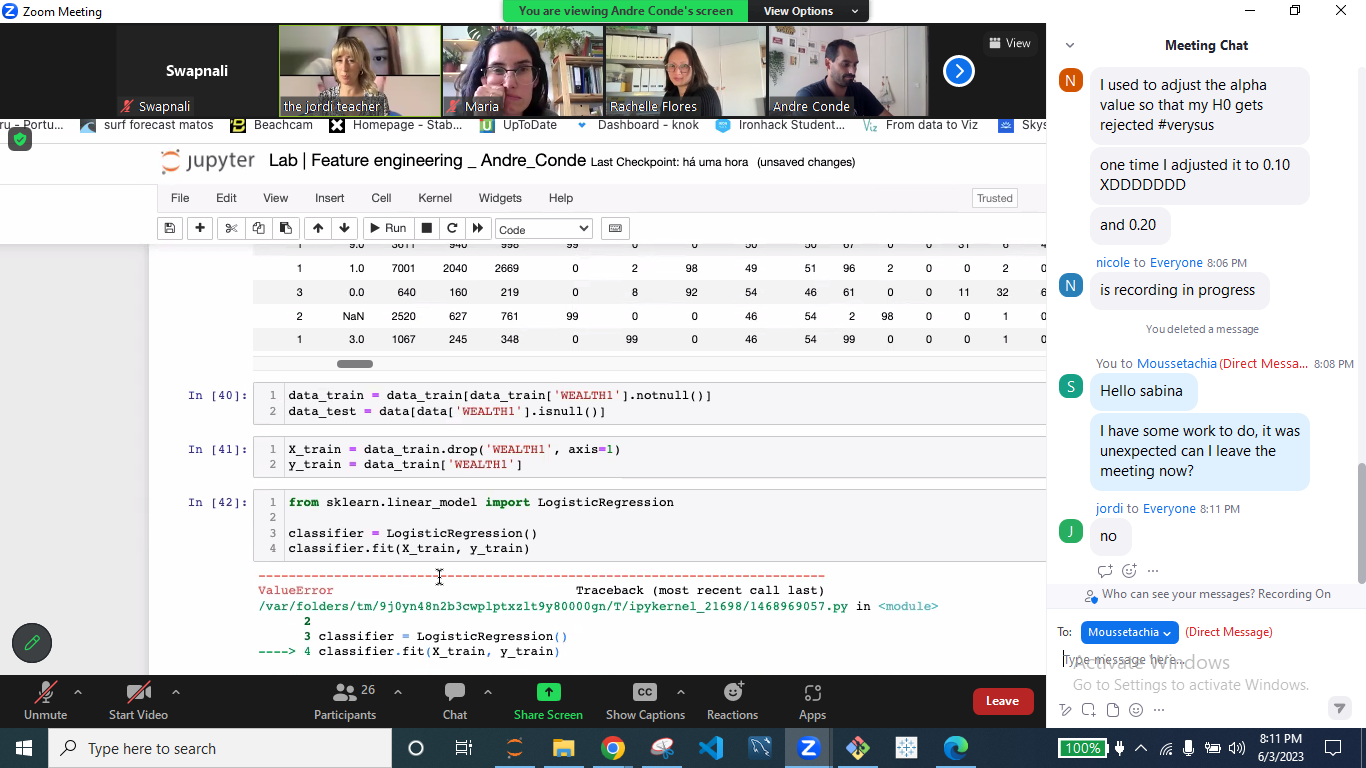

**2. Exclude the following variables by looking at the definitions. Create a new empty list called drop_list. We will append this list and then drop all the columns in this list later:**

OSOURCE - symbol definitions not provided, too many categories
(OSOURCE Origin Source - (Only 1rst 3 bytes are used) - Defaulted to 00000 for conversion - Code indicating which mailing list the donor was originally acquired from -
A nominal or symbolic field.)

ZIP CODE - we are including state already

In [17]:
categorical['OSOURCE'].nunique()

896

In [18]:
categorical['ZIP'].nunique()

19938

In [19]:
drop_list = data[['OSOURCE', 'ZIP']]

In [20]:
drop_list

,OSOURCE,ZIP
0,GRI,61081
1,BOA,91326
2,AMH,27017
3,BRY,95953
4,,33176
...,...,...
95407,ASE,99504
95408,DCD,77379
95409,MBC,48910
95410,PRV,91320


**3. Identify columns that over 85% missing values**

In [21]:
nulls = categorical.isna().sum()
nulls.sort_values(ascending = False).head(80)

GEOCODE2    132
RFA_12        0
RFA_10        0
RFA_9         0
RFA_8         0
           ... 
GEOCODE       0
MAJOR         0
SOLIH         0
SOLP3         0
GARDENIN      0
Length: 74, dtype: int64

In [22]:
#Checking the percentage of null rows:
nulls_percentage = nulls * 100 / len(categorical)
nulls_percentage.sort_values(ascending = False)

GEOCODE2    0.138347
RFA_12      0.000000
RFA_10      0.000000
RFA_9       0.000000
RFA_8       0.000000
              ...   
GEOCODE     0.000000
MAJOR       0.000000
SOLIH       0.000000
SOLP3       0.000000
GARDENIN    0.000000
Length: 74, dtype: float64

In [23]:
nulls_percentage_df = pd.DataFrame(nulls_percentage, columns = ['percentage'])
nulls_percentage_df

,percentage
OSOURCE,0.000000
STATE,0.000000
ZIP,0.000000
MAILCODE,0.000000
PVASTATE,0.000000
...,...
RFA_2A,0.000000
MDMAUD_R,0.000000
MDMAUD_F,0.000000
MDMAUD_A,0.000000


In [24]:
high_nulls = list(nulls_percentage_df[nulls_percentage_df['percentage'] > 0.85].index)
high_nulls

[]

**4. Remove those columns from the dataframe**

- None of the columns has over 85% missing values hence not removing any column from categorical dataframe

**5. Reduce the number of categories in the column GENDER. The column should only have either "M" for males, "F" for females, and "other" for all the rest**

In [25]:
categorical['GENDER'].value_counts()

F    51277
M    39094
      2957
U     1715
J      365
C        2
A        2
Name: GENDER, dtype: int64

In [26]:
categorical['GENDER'].unique()

array(['F', 'M', ' ', 'C', 'U', 'J', 'A'], dtype=object)

 - Note that there are a few null values in the column. We will first replace those null values using the code below:
 
print(categorical['GENDER'].value_counts())

categorical['GENDER'] = categorical['GENDER'].fillna('F')

In [27]:
# Replacing a null values using below code
categorical['GENDER'] = categorical['GENDER'].replace(' ', 'F')

In [28]:
categorical['GENDER'].value_counts()

F    54234
M    39094
U     1715
J      365
C        2
A        2
Name: GENDER, dtype: int64

In [35]:
categorical['GENDER'] = categorical['GENDER'].replace('U', 'other')
categorical['GENDER'] = categorical['GENDER'].replace('J', 'other')
categorical['GENDER'] = categorical['GENDER'].replace('C', 'other')
categorical['GENDER'] = categorical['GENDER'].replace('A', 'other')

In [36]:
categorical['GENDER'].value_counts()

F        54234
M        39094
other     2084
Name: GENDER, dtype: int64